In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### EDA Starts

### Shape of data

In [4]:
print ('Shape of the data is as follows ', data.shape)
print ('Number of records is ', data.shape[0])
print ('Number of features/attributes for each record is ', data.shape[1])

Shape of the data is as follows  (1338, 7)
Number of records is  1338
Number of features/attributes for each record is  7


### Data Type of Attributes

In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Missing Attributes in Data

    - We find that there are no missing values in the dataset

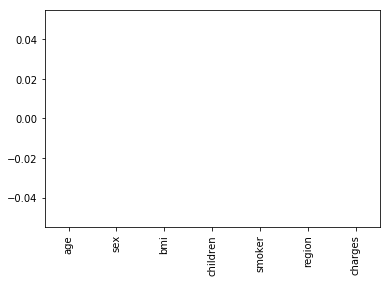

In [6]:
data.isnull().sum().plot(kind='bar')

### 5 Points Summary of Numerical Attributes - WIP

    The five-number summary involves the calculation of 5 summary statistical quantities: namely:
    1. Median: The middle value in the sample, also called the 50th percentile or the 2nd quartile.
    2. 1st Quartile: The 25th percentile.
    3. 3rd Quartile: The 75th percentile.
    4. Minimum: The smallest observation in the sample.
    5. Maximum: The largest observation in the sample.

In [7]:
def print_five_point_summary(feature, feature_name, do_print=True):
    median = np.median(feature)
    
    sorted_feature_data = sorted(feature)
    q1, q3= np.percentile(sorted_feature_data,[25,75])

    min_value = np.min(sorted_feature_data)
    max_value = np.max(sorted_feature_data)

    if do_print:
        print ('\nPrinting 5 point summary for %s'%(feature_name))
        print ('-----------------------------------')
        print ('\nMax value of %s is %d'%(feature_name, max_value))
        print ('Min value of %s is %d'%(feature_name, min_value))
        print ('Median value of %s is %d'%(feature_name, median))
        print ('1st Quartile value of %s is %d'%(feature_name, q1))
        print ('3rd Quartile value of %s is %d'%(feature_name, q3))

    five_point_summary = {'median':median,
                         'q1':q1,
                         'q3':q3,
                         'minvalue':min_value,
                         'max_value':max_value}
    return five_point_summary

In [8]:
print_five_point_summary(data['bmi'],'BMI')
print_five_point_summary(data['age'],'Age')
print_five_point_summary(data['charges'],'Charges')
print_five_point_summary(data['children'],'Children')


Printing 5 point summary for BMI
-----------------------------------

Max value of BMI is 53
Min value of BMI is 15
Median value of BMI is 30
1st Quartile value of BMI is 26
3rd Quartile value of BMI is 34

Printing 5 point summary for Age
-----------------------------------

Max value of Age is 64
Min value of Age is 18
Median value of Age is 39
1st Quartile value of Age is 27
3rd Quartile value of Age is 51

Printing 5 point summary for Charges
-----------------------------------

Max value of Charges is 63770
Min value of Charges is 1121
Median value of Charges is 9382
1st Quartile value of Charges is 4740
3rd Quartile value of Charges is 16639

Printing 5 point summary for Children
-----------------------------------

Max value of Children is 5
Min value of Children is 0
Median value of Children is 1
1st Quartile value of Children is 0
3rd Quartile value of Children is 2


{'median': 1.0, 'q1': 0.0, 'q3': 2.0, 'minvalue': 0, 'max_value': 5}

### Measure skewness of bmi, age and charges columns

#### A) Checking skewness for BMI

    - We find that the data is now skewed

Text(0, 0.5, 'Count')

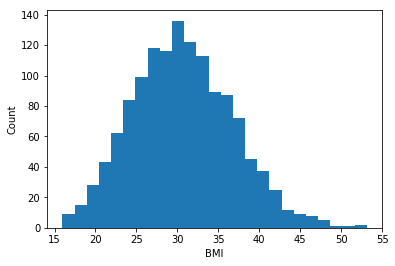

In [9]:
plt.hist(data['bmi'], bins=25)
plt.xlabel('BMI')
plt.ylabel('Count')

#### B) Checking skewness for Age

    - We find that the data is skewed toward left, as in there are more records for people with age around 20

Text(0, 0.5, 'Count')

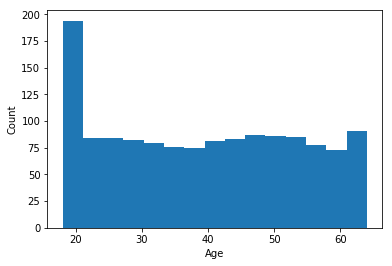

In [10]:
plt.hist(data['age'], bins=15)
plt.xlabel('Age')
plt.ylabel('Count')

#### C) Checking skewness for Charges

    - We find that the data is skewed toward left, as in there are more instances of records where the insurance charge is less that 10000.
    - This ties back to the skewness observed in the age attribute. 
    - Collectively they both show that there are more records for younger people and that their insurane charges are lesser

Text(0, 0.5, 'Count')

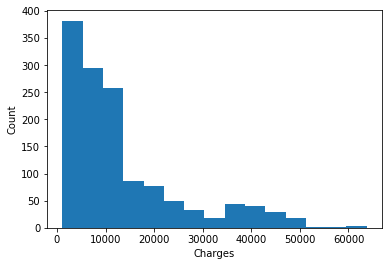

In [11]:
plt.hist(data['charges'], bins=15)
plt.xlabel('Charges')
plt.ylabel('Count')

#### D) Boxplot for Age and Charges

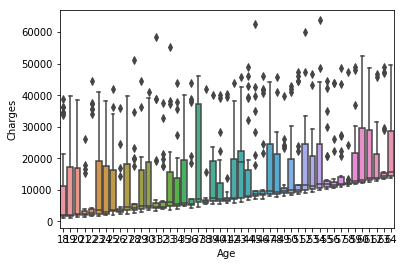

In [12]:
import seaborn as sb

sb.boxplot(x='age', y='charges', data=data)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

### Outliers in bmi, age and charges columns

    Outliers can be detected using a scatter plot or via z-score or via iqr values. In this notebook i have used the z-score method to identify outliers

In [13]:
def identify_outlier(feature, feature_name):
    outliers = []
    mean_feature = np.mean(feature)
    std_feature =np.std(feature)
    threshold = 3
    for value in feature:
        z_score= (value - mean_feature)/std_feature 
        if np.abs(z_score) > threshold:
            outliers.append(value)
    print ('Outlier in %s are %s'%(feature_name,outliers))

In [14]:
identify_outlier(data['bmi'],'BMI')
identify_outlier(data['age'],'Age')
identify_outlier(data['charges'],'Charges')

Outlier in BMI are [49.06, 50.38, 52.58, 53.13]
Outlier in Age are []
Outlier in Charges are [51194.55914, 63770.42801, 58571.074479999996, 55135.402089999996, 52590.82939, 60021.39897, 62592.87309]


### Distribution of categorical columns

    We see that there are three categorical featurs in this dataset; sex, smoker, region

In [15]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

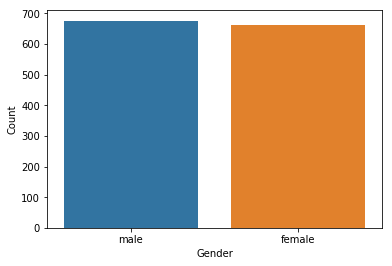

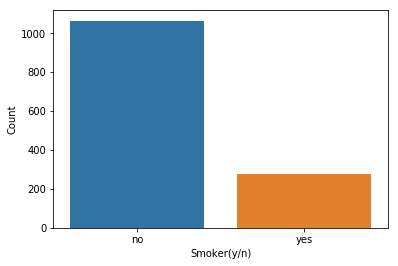

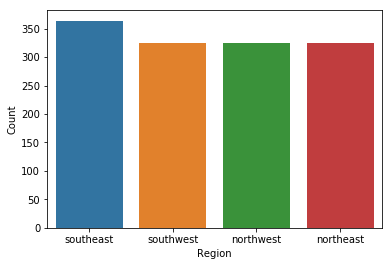

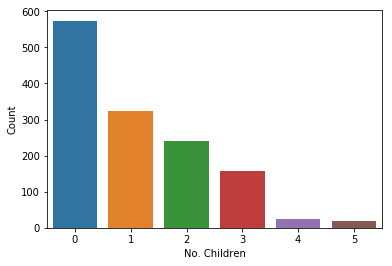

In [16]:
sex_counts = data['sex'].value_counts()
sb.barplot(sex_counts.index, sex_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

type_counts = data ['smoker'].value_counts()
sb.barplot(type_counts.index, type_counts.values)
plt.xlabel('Smoker(y/n)')
plt.ylabel('Count')
plt.show()

type_counts = data ['region'].value_counts()
sb.barplot(type_counts.index, type_counts.values)
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

type_counts = data ['children'].value_counts()
sb.barplot(type_counts.index, type_counts.values)
plt.xlabel('No. Children')
plt.ylabel('Count')
plt.show()

#### Drawing Corelations

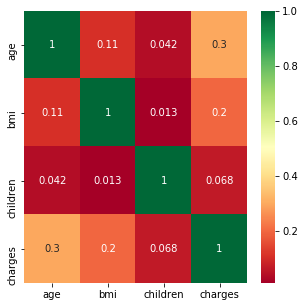

In [17]:
corelation_matrix = data.corr()
top_corelation_features = corelation_matrix.index
plt.figure(figsize=(5,5))
g = sb.heatmap(data[top_corelation_features].corr(), annot=True, cmap='RdYlGn')

#### Observations:

    1. We see that there is a positive co-relation between Age & Charges - which means that as Age increases, Charges increases
    2. We see that there is co-relation between BMI and Charges but it's a weak co-relation. So, BMI does not have a very strong impact on the Charges

### Comparing Charges for Smokers & Non-Smokers

    - Extract data for smokers
    - Extract data for non-smokers
    
    - First we compare the mean value for the 'Charges' feature for both smokers and non-smokers. We see that smokers have more charges
    - Then we draw the displot() for the Charges and find that smokers have more charges
    
    Observation - Charges for smokers is high

8434.268297856199
32050.23183153285
We can see that the mean charge for smokers is much more than that of non-smokes


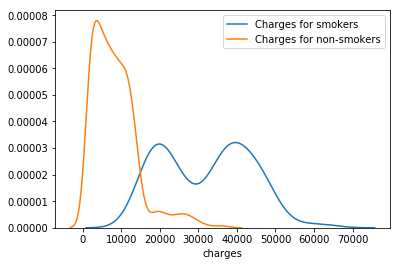

In [18]:
smokers_data = data[data['smoker']=='yes']
smokers_data_df = pd.DataFrame(data=smokers_data)

non_smokers_data = data[data['smoker']=='no']
non_smokers_data_df = pd.DataFrame(data=non_smokers_data)

mean_charges_smokers = np.mean(smokers_data_df['charges'])
mean_charges_non_smokers = np.mean(non_smokers_data_df['charges'])

print (mean_charges_non_smokers)
print (mean_charges_smokers)

print ('We can see that the mean charge for smokers is much more than that of non-smokes')

sb.distplot(smokers_data_df['charges'], hist=False, label='Charges for smokers')
sb.distplot(non_smokers_data_df['charges'], hist=False, label='Charges for non-smokers')
plt.legend()
plt.show()

### Comparing BMI for Males & Females

    - Extract data for males and extrac the values of BMI feature
    - Extract data for females and extrac the values of BMI feature
    
    - First we compare the mean for the BMIs and find that they are similar
    - Then we draw the displot() for the BMIs and find that they are quite similar
    
    Observation - BMI for male and females is nearly similar

30.943128698224832
30.377749244713023
We can see that the mean BMI for males is nearly same as that of females


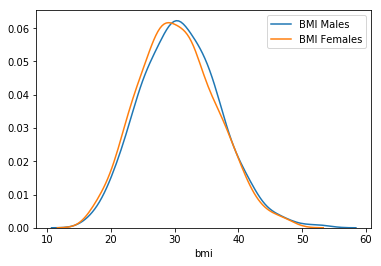

In [19]:
males_data = data[data['sex']=='male']
males_data_df = pd.DataFrame(data=males_data)

females_data = data[data['sex']=='female']
females_data_df = pd.DataFrame(data=females_data)

mean_bmi_males = np.mean(males_data_df['bmi'])
mean_bmi_females = np.mean(females_data_df['bmi'])

print (mean_bmi_males)
print (mean_bmi_females)

print ('We can see that the mean BMI for males is nearly same as that of females')

sb.distplot(males_data_df['bmi'], hist=False, label='BMI Males')
sb.distplot(females_data_df['bmi'], hist=False, label='BMI Females')
plt.legend()
plt.show()

### Comparing Smoker in Males & Females

    - Extract data for male smokers in seperate DataFrame
    - Extract data for female smokers in seperate DataFrame
    - Compare the number of records in both the dataframes
    
    Observation - There were more male smokers in the dataset as compared to female smokers

In [20]:
males_data = data[data['sex']=='male']
males_data_df = pd.DataFrame(data=males_data)
males_smokers = males_data_df[males_data_df['smoker']=='yes']

females_data = data[data['sex']=='female']
females_data_df = pd.DataFrame(data=females_data)
females_smokers = females_data_df[females_data_df['smoker']=='yes']

print ('Number of male smokers =', males_smokers.shape[0])
print ('Number of female smokers =', females_smokers.shape[0])

print ('We can see that there are more male smokers than females')

Number of male smokers = 159
Number of female smokers = 115
We can see that there are more male smokers than females


### Comparing BMI comparision in women with 0, 1 and 2 children

    - We first extract all records for females
    - We seperate records for females with 0,1 and 2 children in seperate Series
    - We then plot the displot() for each of the data set 
    
    Observation - We observe that the BMI for women with 0 and 1 children looks similar however for women for 2 children it is quite distinct

In [21]:
females_data = data[data['sex']=='female']
females_data_df = pd.DataFrame(data=females_data)
women_0_children = females_data_df[females_data_df['children']==0]
women_1_children = females_data_df[females_data_df['children']==1]
women_2_children = females_data_df[females_data_df['children']==2]

print ('Number of women with no children is ', women_0_children.shape[0])
print ('Number of women with 1 children is ', women_1_children.shape[0])
print ('Number of women with 2 children is ', women_2_children.shape[0])

bmi_women_0_children = women_0_children['bmi']
bmi_women_1_children = women_1_children['bmi']
bmi_women_2_children = women_2_children['bmi']

Number of women with no children is  289
Number of women with 1 children is  158
Number of women with 2 children is  119


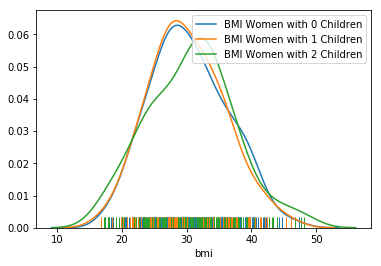

In [22]:
sb.distplot(bmi_women_0_children,hist=False, rug=True, label='BMI Women with 0 Children')
sb.distplot(bmi_women_1_children,hist=False, rug=True, label='BMI Women with 1 Children')
sb.distplot(bmi_women_2_children,hist=False, rug=True, label='BMI Women with 2 Children')

plt.show()